In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
df = yf.download('EURUSD=X', start='2023-1-1')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1.070973,1.071237,1.065326,1.070973,1.070973,0
2023-01-03,1.067771,1.068262,1.052155,1.067771,1.067771,0
2023-01-04,1.054685,1.063151,1.054596,1.054685,1.054685,0
2023-01-05,1.060637,1.063264,1.051558,1.060637,1.060637,0
2023-01-06,1.052222,1.062225,1.048526,1.052222,1.052222,0
...,...,...,...,...,...,...
2023-06-20,1.092430,1.094523,1.089455,1.092430,1.092430,0
2023-06-21,1.092037,1.096131,1.090667,1.092037,1.092037,0
2023-06-22,1.099264,1.101115,1.095110,1.099264,1.099264,0


In [5]:
# Apply the strategy function

# window =1 matlab we are taking the prior day return 
# if window = 2 implies we are taking sum of prior two day return
def strategy(df, window=1):
    df = df.copy()
    df['log_returns'] = np.log(df.Close.pct_change() + 1)
    # prior_n is prior n days returns
    # window ki value prior_n mey put karege
    df['prior_n'] = df.log_returns.rolling(window).sum()
    df.dropna(inplace=True)
    df['position'] = [1 if i>0 else -1 for i in df.prior_n]
    df['strats'] = df.position.shift(1) * df.log_returns # shift 1 row isiliye kyuki hume next day buy karna hai
    return np.exp(df[['log_returns','strats']].cumsum()).plot(figsize=(14,8)) # cumsum() ya cummulative sum normal sum ke jagah isiliye le rahe hai kyuki agar hum sirf sum le lete hai 
    # to hume just overall strategy return milega ya fir return of the asset in general. But what we want is a time series in order
    # to plot it into a line chart.  

<Axes: xlabel='Date'>

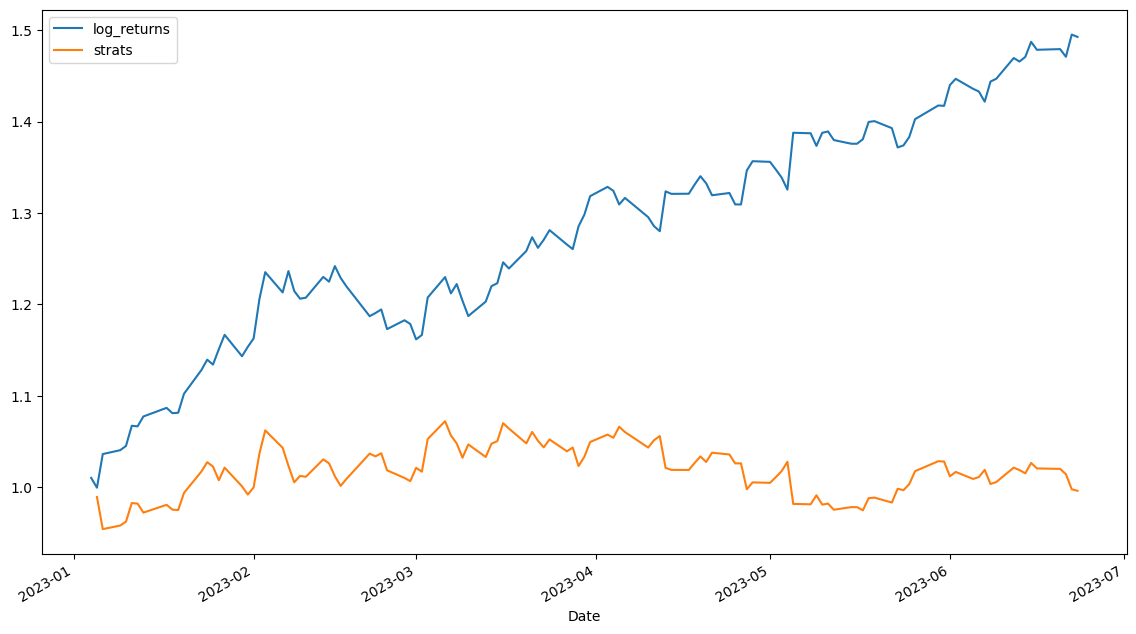

In [9]:
# Checking on AAPL
strategy(df)

<Axes: xlabel='Date'>

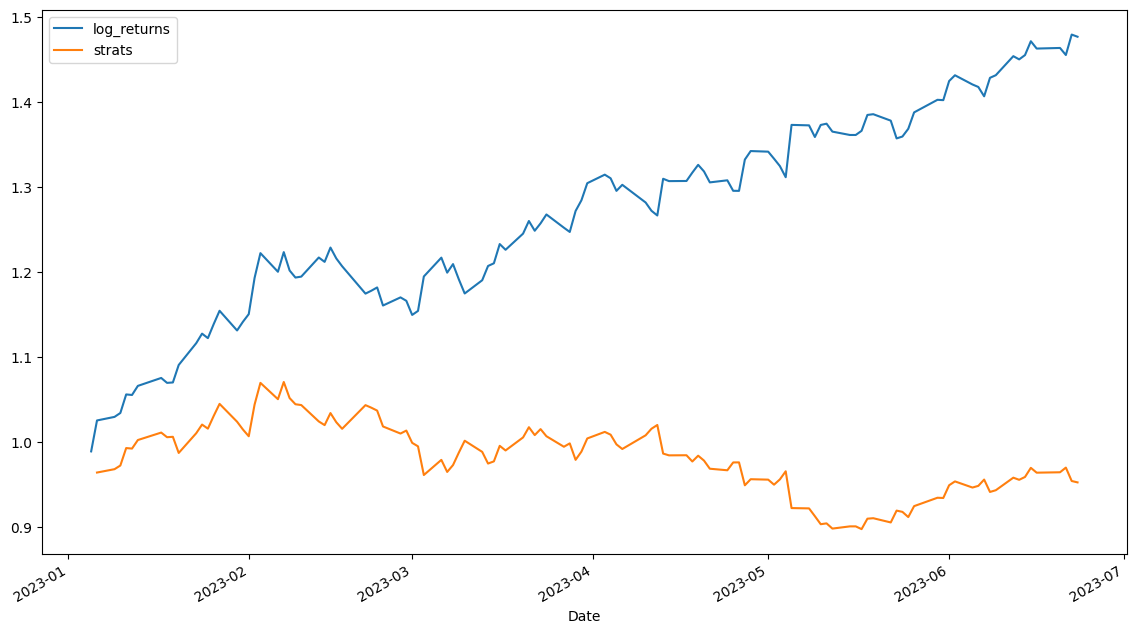

In [10]:
# Two day returns
strategy(df, 2)

<Axes: xlabel='Date'>

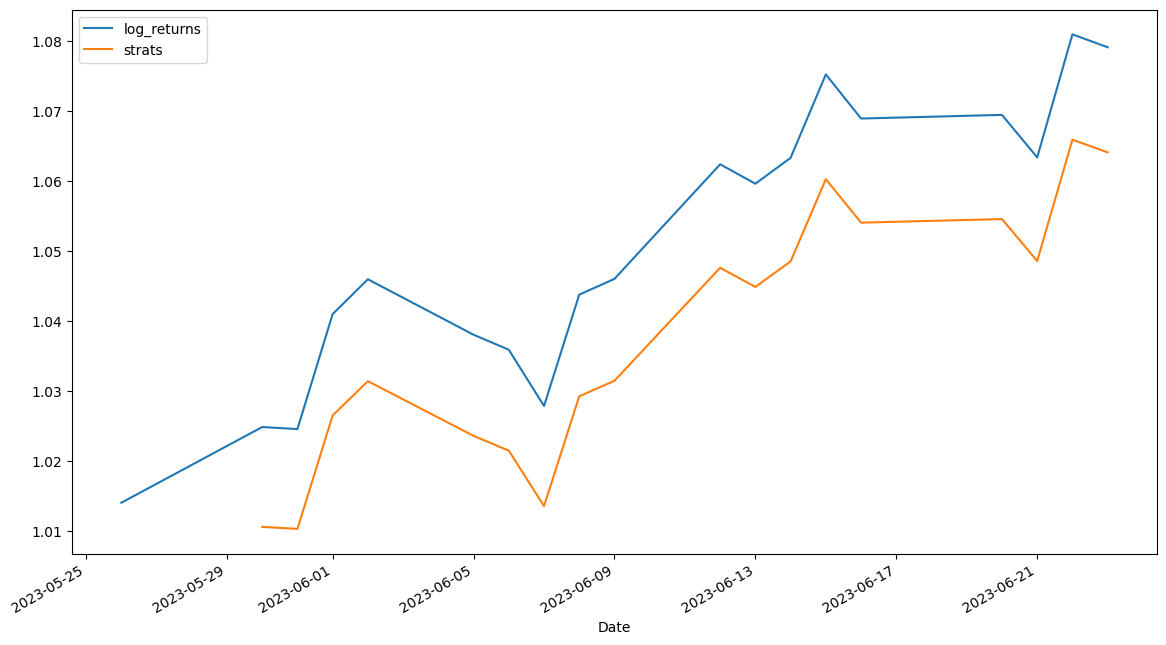

In [11]:
strategy(df, 100)

<Axes: xlabel='Date'>

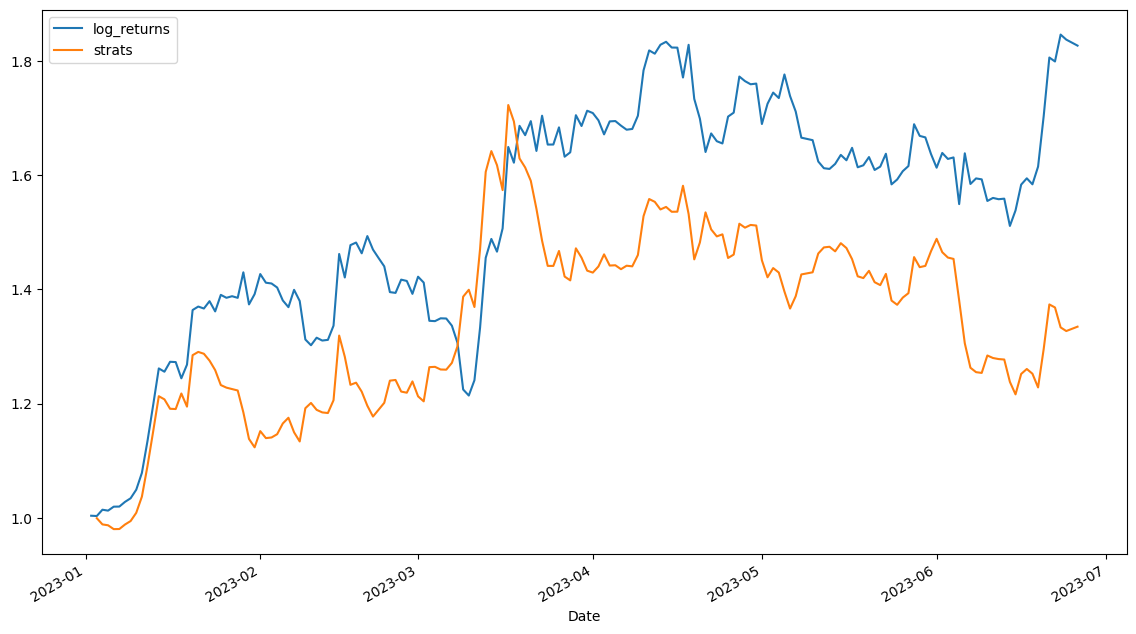

In [16]:
# Checking on Bitcoin
strategy(df)

<Axes: xlabel='Date'>

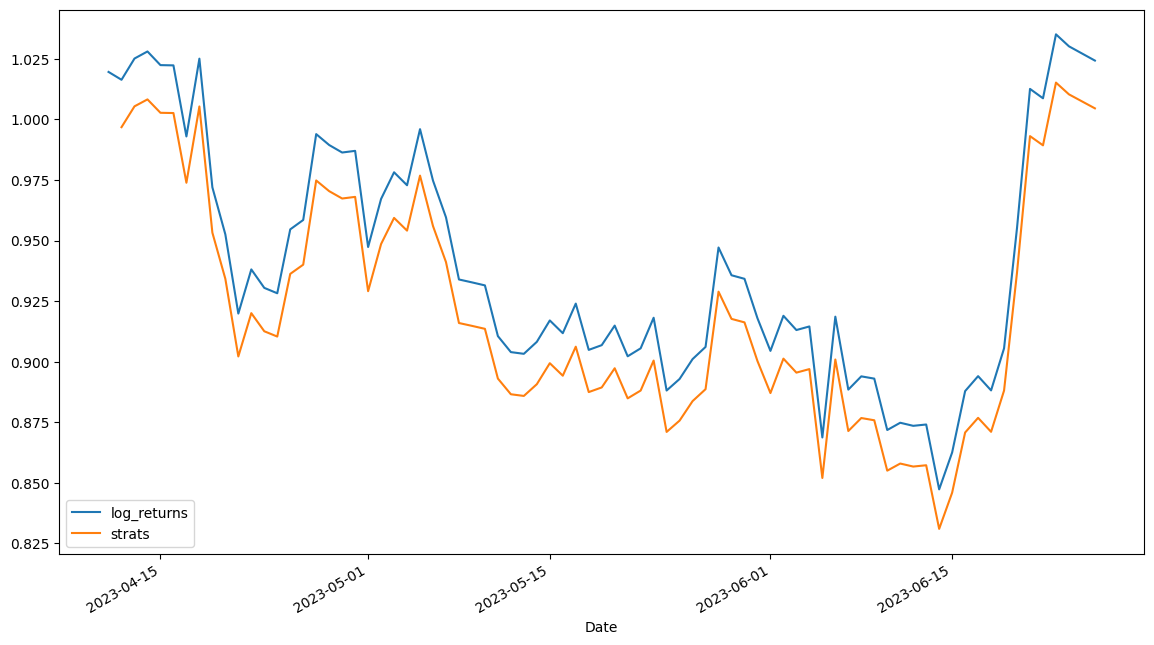

In [17]:
strategy(df, 100)

<Axes: xlabel='Date'>

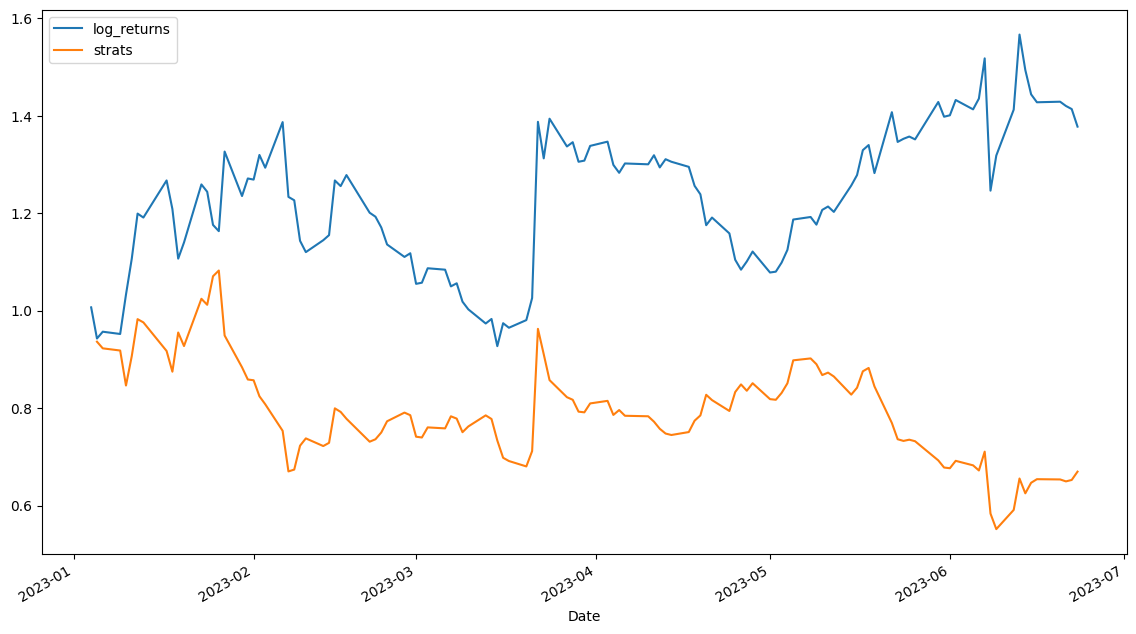

In [21]:
# Lets Check for GameStop Corp
strategy(df)

<Axes: xlabel='Date'>

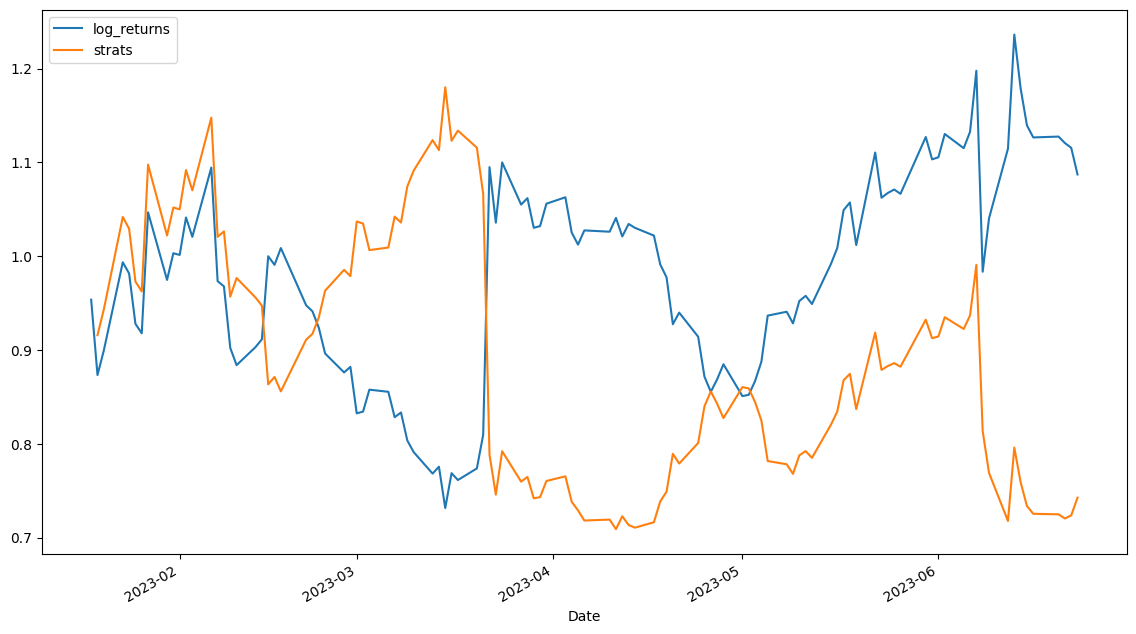

In [22]:
strategy(df, 10)

<Axes: xlabel='Date'>

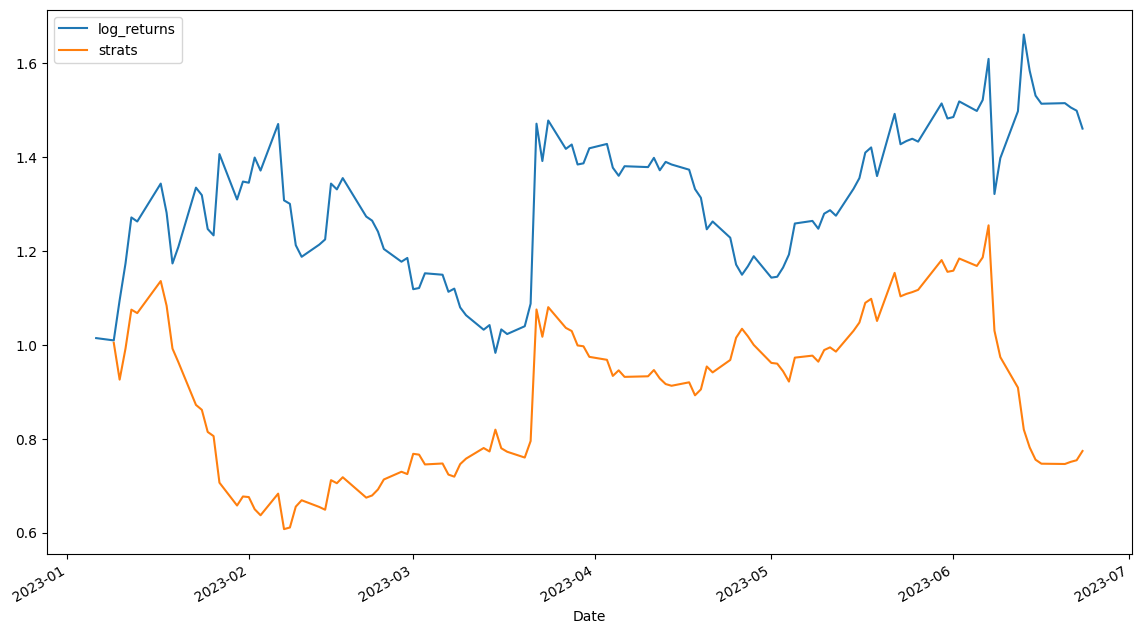

In [23]:
strategy(df, 3)

<Axes: xlabel='Date'>

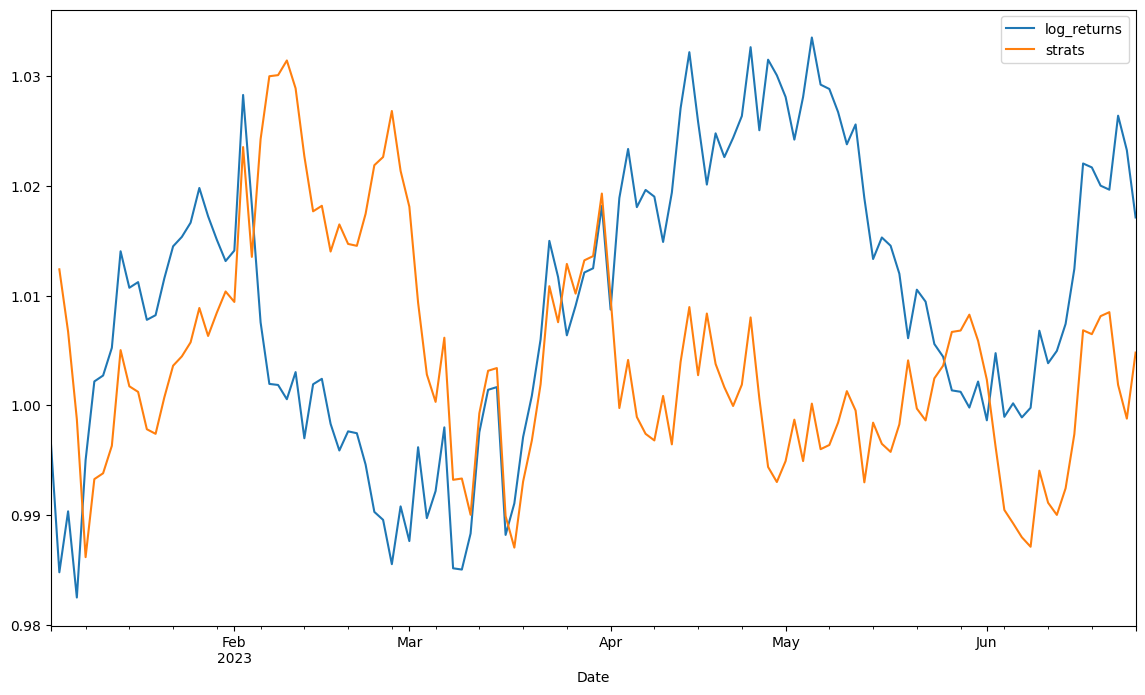

In [27]:
# Let's check for Forex EURUSD=X
strategy(df)

<Axes: xlabel='Date'>

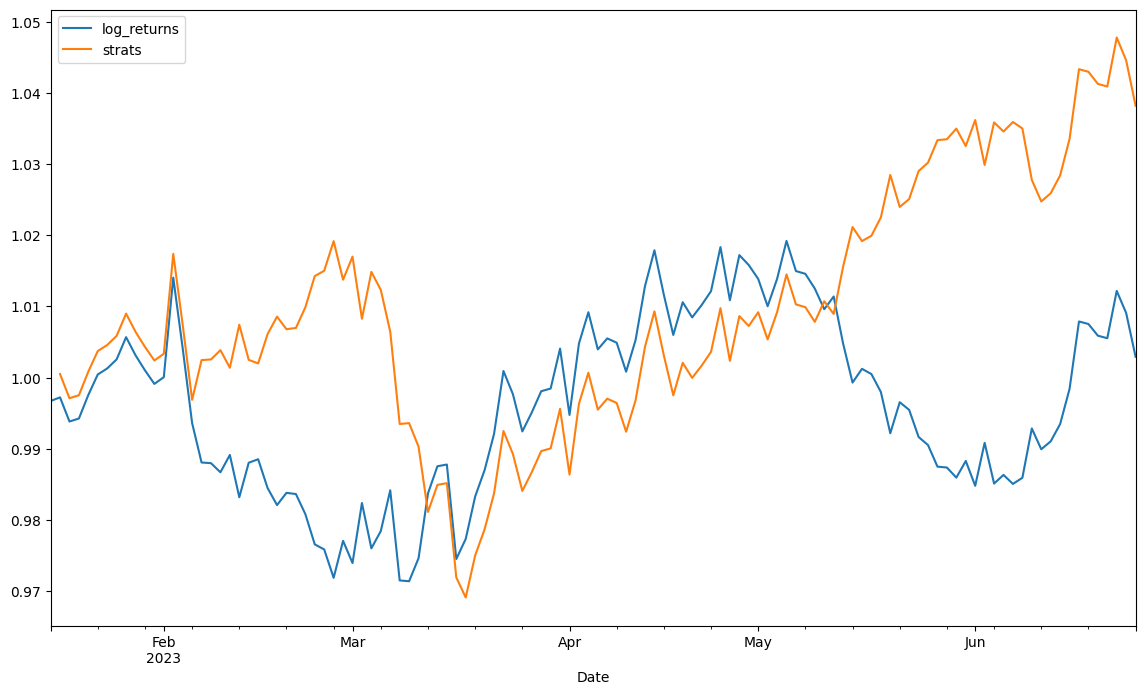

In [6]:
strategy(df, 10)

In [11]:
# Intraday
df_one = yf.download('BTC-USD', start=2023-6-22, interval='1m')#1 minutes ka interval

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: 1m data not available for startTime=1410912000 and endTime=1687769377. Only 7 days worth of 1m granularity data are allowed to be fetched per request.
